📊 Principais Insights Possíveis
1. Análise de Churn (Evasão de Clientes)
Campos: churn, satisfacao_geral, atrasos_pagamento, usa_app_mobile, participa_programa_fidelidade
Insights:

Taxa de churn por nível de satisfação
Correlação entre atrasos e evasão
Impacto do uso do app mobile na retenção
Efetividade do programa de fidelidade

2. Segmentação de Clientes
Campos: idade, renda_mensal, saldo_conta, score_credito, tipo_conta
Insights:

Perfis de clientes por faixa etária
Segmentos por capacidade financeira
Clusters de comportamento (alto valor, risco, potencial)
Preferências de produtos por perfil demográfico

3. Comportamento Transacional
Campos: numero_transacoes_mes, media_valor_transacao, tipo_conta, usa_app_mobile
Insights:

Padrões de uso por tipo de conta
Valor médio transacional por segmento
Impacto do app mobile no volume de transações
Identificação de clientes inativos ou super-ativos

4. Análise de Risco e Crédito
Campos: score_credito, atrasos_pagamento, possui_cartao_credito, renda_mensal, saldo_conta
Insights:

Perfil de inadimplência
Clientes elegíveis para upgrade de produtos
Correlação entre score e comportamento financeiro
Oportunidades de cross-selling (cartão de crédito)

5. Satisfação do Cliente
Campos: satisfacao_geral, tipo_conta, usa_app_mobile, participa_programa_fidelidade
Insights:

Drivers de satisfação
NPS estimado por segmento
Pontos de melhoria por produto
Relação entre engajamento digital e satisfação

6. Engajamento Digital
Campos: usa_app_mobile, numero_transacoes_mes, idade, tipo_conta
Insights:

Taxa de adoção digital por geração
Correlação entre uso do app e atividade
Oportunidades de migração para canais digitais


# Etapa 1) Extração dos Dados

## Fonte de Dados
- Arquivo: `clientes_bancarios.csv`
- Encoding: UTF-8
- Tipo: CSV (Comma Separated Values)

In [3]:
import pandas as pd

# Lê o arquivo CSV e carrega em um DataFrame
df_clientes = pd.read_csv('clientes_bancarios.csv', encoding='utf-8')

print("DataFrame carregado com sucesso!")
print("\nPrimeiras 5 linhas do DataFrame:")
print(df_clientes.head())

DataFrame carregado com sucesso!

Primeiras 5 linhas do DataFrame:
   id_cliente  idade     genero  renda_mensal  saldo_conta  score_credito  \
0           1     56  Masculino          8921         5124            403   
1           2     69   Feminino         11449         1015            338   
2           3     46   Feminino          5952         2193            497   
3           4     32   Feminino         11762         8415            878   
4           5     60   Feminino          7381        13550            690   

  possui_cartao_credito  numero_transacoes_mes  media_valor_transacao  \
0                   Não                      8                 276.55   
1                   Não                     10                 598.97   
2                   Sim                     62                 688.38   
3                   Não                     26                 553.57   
4                   Não                     30                 657.15   

   atrasos_pagamento    tipo_co

# Etapa 2) Preparação dos dados

## Tratamento Completo de Tipos
Conversão e validação de todos os campos:
- Inteiros: idade, score_credito, numero_transacoes_mes
- Decimal(16,2): renda_mensal, saldo_conta
- Strings (categóricas): genero, possui_cartao_credito, tipo_conta, usa_app_mobile, participa_programa_fidelidade, churn

In [5]:
def converter_tipos_dados(df):
    """
    Função para converter os tipos de dados do DataFrame
    """
    df_convertido = df.copy()
    
    # Definir tipos de colunas
    colunas_int = ['idade', 'score_credito', 'numero_transacoes_mes']
    colunas_decimal = ['renda_mensal', 'saldo_conta']
    colunas_texto = ['possui_cartao_credito', 'usa_app_mobile', 
                     'participa_programa_fidelidade', 'churn']
    
    # Converter colunas inteiras
    for col in colunas_int:
        if col in df_convertido.columns:
            df_convertido[col] = pd.to_numeric(df_convertido[col], errors='coerce').fillna(0).astype('int64')
    
    # Converter colunas decimais
    for col in colunas_decimal:
        if col in df_convertido.columns:
            df_convertido[col] = pd.to_numeric(df_convertido[col], errors='coerce').fillna(0).astype('float64').round(2)
    
    # Converter colunas de texto
    for col in colunas_texto:
        if col in df_convertido.columns:
            df_convertido[col] = df_convertido[col].astype('string')
    
    return df_convertido


# Testar as funções com os dados
print("=== Conversão de Tipos ===")
df_convertido = converter_tipos_dados(df_clientes)
print("\nTipos de dados antes da conversão:")
print(df_clientes.dtypes)
print("\nTipos de dados após conversão:")
print(df_convertido.dtypes)



=== Conversão de Tipos ===

Tipos de dados antes da conversão:
id_cliente                         int64
idade                              int64
genero                            object
renda_mensal                       int64
saldo_conta                        int64
score_credito                      int64
possui_cartao_credito             object
numero_transacoes_mes              int64
media_valor_transacao            float64
atrasos_pagamento                  int64
tipo_conta                        object
usa_app_mobile                    object
participa_programa_fidelidade     object
satisfacao_geral                   int64
churn                             object
dtype: object

Tipos de dados após conversão:
id_cliente                                int64
idade                                     int64
genero                                   object
renda_mensal                            float64
saldo_conta                             float64
score_credito                       

## Tratamento de Valores de Domínio

Validação de campos categóricos:
- possui_cartao_credito → [Sim, Não]
- usa_app_mobile → [Sim, Não]
- participa_programa_fidelidade → [Sim, Não]
- churn → [Sim, Não]

In [6]:

def validar_valores(df):
    """
    Função para validar e padronizar os valores do DataFrame
    """
    df_validado = df.copy()
    
    # Definir valores válidos para campos categóricos
    colunas_categoricas = {
        'possui_cartao_credito': ['Sim', 'Não'],
        'usa_app_mobile': ['Sim', 'Não'],
        'participa_programa_fidelidade': ['Sim', 'Não'],
        'churn': ['Sim', 'Não']
    }
    
    # Validar e padronizar colunas categóricas
    for col, valores_validos in colunas_categoricas.items():
        if col in df_validado.columns:
            # Limpar e padronizar strings
            df_validado[col] = df_validado[col].str.lower().str.strip()
            
            # Mapear variações comuns para valores padrão
            mapa_valores = {
                'yes': 'sim', 'y': 'sim', 's': 'sim', '1': 'sim', 'true': 'sim',
                'no': 'não', 'n': 'não', '0': 'não', 'false': 'não'
            }
            df_validado[col] = df_validado[col].map(mapa_valores).fillna(df_validado[col])
            
            # Substituir valores inválidos por valor padrão
            mascara = ~df_validado[col].str.lower().isin([v.lower() for v in valores_validos])
            df_validado.loc[mascara, col] = valores_validos[0]
    
    return df_validado
print("\n=== Validação de Valores ===")
df_tratado = validar_valores(df_convertido)
print("\nAmostra dos dados após validação:")
print(df_tratado.head())



=== Validação de Valores ===

Amostra dos dados após validação:
   id_cliente  idade     genero  renda_mensal  saldo_conta  score_credito  \
0           1     56  Masculino        8921.0       5124.0            403   
1           2     69   Feminino       11449.0       1015.0            338   
2           3     46   Feminino        5952.0       2193.0            497   
3           4     32   Feminino       11762.0       8415.0            878   
4           5     60   Feminino        7381.0      13550.0            690   

  possui_cartao_credito  numero_transacoes_mes  media_valor_transacao  \
0                   não                      8                 276.55   
1                   não                     10                 598.97   
2                   sim                     62                 688.38   
3                   não                     26                 553.57   
4                   não                     30                 657.15   

   atrasos_pagamento    tipo_cont

# Etapa 3) Aplicação de Regras

## Segmentação de Clientes
Campos: idade, renda_mensal, saldo_conta, score_credito, tipo_conta
Insights:

Perfis de clientes por faixa etária
Segmentos por capacidade financeira
Clusters de comportamento (alto valor, risco, potencial)
Preferências de produtos por perfil demográfico

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

def analisar_segmentos_clientes(df):
    """
    Função para análise detalhada de segmentação de clientes
    """
    resultados = {}
    
    # 1. Análise por Faixa Etária
    df['faixa_etaria'] = pd.cut(df['idade'], 
                               bins=[0, 25, 35, 50, 65, 100],
                               labels=['18-25', '26-35', '36-50', '51-65', '65+'])
    
    perfil_idade = df.groupby('faixa_etaria').agg({
        'renda_mensal': 'mean',
        'saldo_conta': 'mean',
        'score_credito': 'mean'
    }).round(2)
    
    # 2. Segmentação por Capacidade Financeira
    df['segmento_financeiro'] = pd.qcut(df['renda_mensal'], 
                                      q=3, 
                                      labels=['Básico', 'Intermediário', 'Premium'])
    
    perfil_financeiro = df.groupby('segmento_financeiro').agg({
        'saldo_conta': 'mean',
        'score_credito': 'mean',
        'idade': 'mean'
    }).round(2)
    
    # 3. Clusters de Comportamento
    # Preparar dados para clustering
    features_cluster = ['idade', 'renda_mensal', 'saldo_conta', 'score_credito']
    X = df[features_cluster].copy()
    
    # Normalizar dados
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Aplicar K-means
    kmeans = KMeans(n_clusters=3, random_state=42)
    df['cluster'] = kmeans.fit_predict(X_scaled)
    
    # Análise dos clusters
    perfil_clusters = df.groupby('cluster').agg({
        'idade': 'mean',
        'renda_mensal': 'mean',
        'saldo_conta': 'mean',
        'score_credito': 'mean'
    }).round(2)
    
    # 4. Análise por Tipo de Conta
    perfil_conta = df.groupby('tipo_conta').agg({
        'idade': 'mean',
        'renda_mensal': 'mean',
        'saldo_conta': 'mean',
        'score_credito': 'mean'
    }).round(2)
    
    # Armazenar resultados
    resultados['perfil_idade'] = perfil_idade
    resultados['perfil_financeiro'] = perfil_financeiro
    resultados['perfil_clusters'] = perfil_clusters
    resultados['perfil_conta'] = perfil_conta
    
    return resultados, df

# Realizar análise
resultados_segmentacao, df_segmentado = analisar_segmentos_clientes(df_tratado)

C:\Users\Natan\AppData\Local\Temp\ipykernel_2956\3408599788.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  perfil_idade = df.groupby('faixa_etaria').agg({
C:\Users\Natan\AppData\Local\Temp\ipykernel_2956\3408599788.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  perfil_financeiro = df.groupby('segmento_financeiro').agg({


# Etapa 4) Resultado Gerado

## Segmentação de Clientes
Perfis de clientes por faixa etária
Segmentos por capacidade financeira
Clusters de comportamento (alto valor, risco, potencial)
Preferências de produtos por perfil demográfico

C:\Users\Natan\AppData\Local\Temp\ipykernel_2956\3844191875.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot(x=df_segmentado.groupby('segmento_financeiro')['renda_mensal'].mean().index,
C:\Users\Natan\AppData\Local\Temp\ipykernel_2956\3844191875.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  y=df_segmentado.groupby('segmento_financeiro')['renda_mensal'].mean().values,


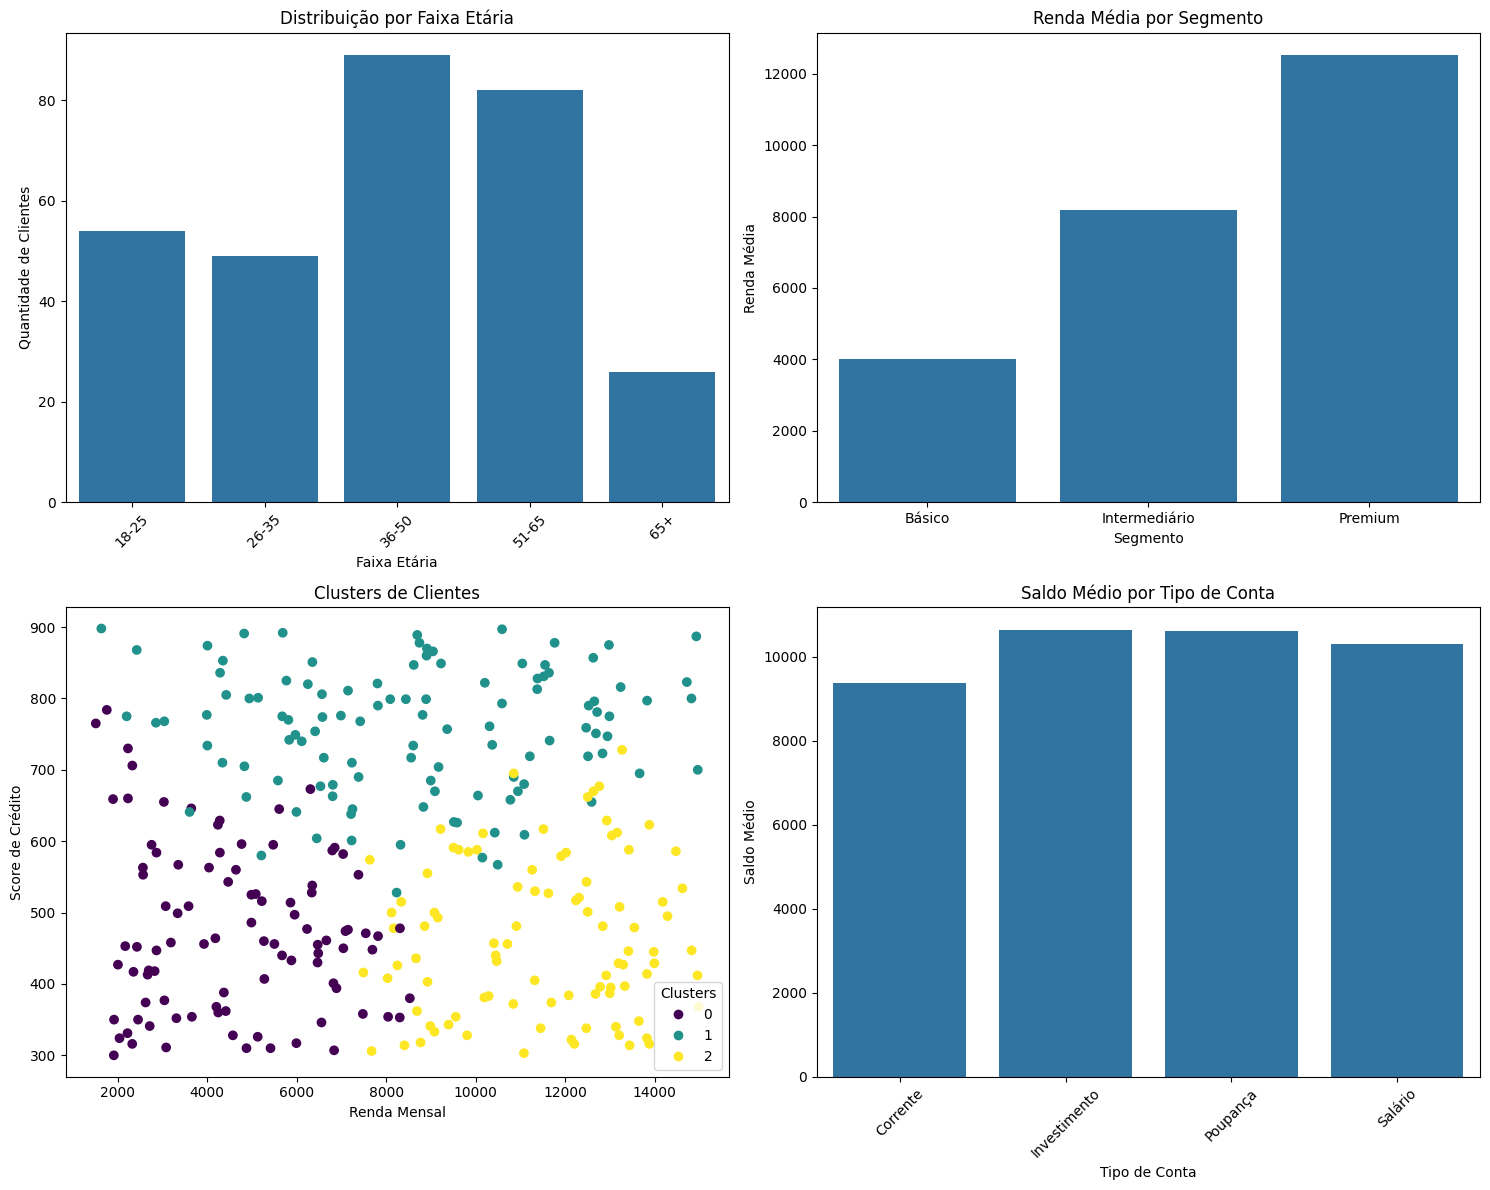


=== Análise de Segmentação de Clientes ===

1. Perfil por Faixa Etária:
              renda_mensal  saldo_conta  score_credito
faixa_etaria                                          
18-25              8006.63      9745.17         607.89
26-35              8367.96     10330.86         593.10
36-50              8129.00      9525.26         576.94
51-65              8637.91     11208.02         568.06
65+                7673.27     10425.46         497.27

2. Perfil por Segmento Financeiro:
                     saldo_conta  score_credito  idade
segmento_financeiro                                   
Básico                  10079.58         566.16  42.06
Intermediário           10586.84         581.83  45.36
Premium                 10036.77         579.47  42.54

3. Perfil dos Clusters:
         idade  renda_mensal  saldo_conta  score_credito
cluster                                                 
0        46.95       4646.06      9421.15         474.00
1        37.68       8610.72     10

In [11]:
# Criar figura para os gráficos com estilo padrão
plt.rcParams['figure.figsize'] = [15, 12]
fig, axes = plt.subplots(2, 2)

# 1. Distribuição por Faixa Etária
sns.barplot(x=df_segmentado['faixa_etaria'].value_counts().index, 
            y=df_segmentado['faixa_etaria'].value_counts().values,
            ax=axes[0,0])
axes[0,0].set_title('Distribuição por Faixa Etária')
axes[0,0].set_xlabel('Faixa Etária')
axes[0,0].set_ylabel('Quantidade de Clientes')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Renda Média por Segmento Financeiro
sns.barplot(x=df_segmentado.groupby('segmento_financeiro')['renda_mensal'].mean().index,
            y=df_segmentado.groupby('segmento_financeiro')['renda_mensal'].mean().values,
            ax=axes[0,1])
axes[0,1].set_title('Renda Média por Segmento')
axes[0,1].set_xlabel('Segmento')
axes[0,1].set_ylabel('Renda Média')

# 3. Visualização dos Clusters
scatter = axes[1,0].scatter(df_segmentado['renda_mensal'], 
                          df_segmentado['score_credito'],
                          c=df_segmentado['cluster'],
                          cmap='viridis')
axes[1,0].set_title('Clusters de Clientes')
axes[1,0].set_xlabel('Renda Mensal')
axes[1,0].set_ylabel('Score de Crédito')
axes[1,0].legend(*scatter.legend_elements(), title="Clusters")

# 4. Média de Saldo por Tipo de Conta
sns.barplot(x=df_segmentado.groupby('tipo_conta')['saldo_conta'].mean().index,
            y=df_segmentado.groupby('tipo_conta')['saldo_conta'].mean().values,
            ax=axes[1,1])
axes[1,1].set_title('Saldo Médio por Tipo de Conta')
axes[1,1].set_xlabel('Tipo de Conta')
axes[1,1].set_ylabel('Saldo Médio')
axes[1,1].tick_params(axis='x', rotation=45)

# Ajustar layout
plt.tight_layout()
plt.show()

# Imprimir análises detalhadas
print("\n=== Análise de Segmentação de Clientes ===")

print("\n1. Perfil por Faixa Etária:")
print(resultados_segmentacao['perfil_idade'])

print("\n2. Perfil por Segmento Financeiro:")
print(resultados_segmentacao['perfil_financeiro'])

print("\n3. Perfil dos Clusters:")
print(resultados_segmentacao['perfil_clusters'])

print("\n4. Perfil por Tipo de Conta:")
print(resultados_segmentacao['perfil_conta'])

# Etapa 5) Análise de Satisfação do Cliente

## Objetivos da Análise:
1. Identificar os principais drivers de satisfação
2. Calcular NPS (Net Promoter Score) por segmento
3. Identificar pontos de melhoria por produto
4. Analisar a relação entre engajamento digital e satisfação

## Métricas Analisadas:
- Satisfação geral por tipo de conta
- Impacto do uso do app mobile na satisfação
- Efeito do programa de fidelidade
- Correlação entre características do cliente e satisfação

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def analisar_satisfacao_clientes(df):
    """
    Função para análise detalhada da satisfação dos clientes
    """
    resultados = {}
    
    # 1. Drivers de Satisfação
    # Calcular correlações entre satisfação e outras variáveis
    variaveis_correlacao = ['satisfacao_geral', 'idade', 'renda_mensal', 'saldo_conta', 'score_credito']
    correlacoes = df[variaveis_correlacao].corr()['satisfacao_geral'].sort_values(ascending=False)
    
    # 2. NPS por Segmento
    def calcular_nps(grupo):
        # Considerando satisfação 9-10 como promotores, 7-8 neutros, 0-6 detratores
        promotores = (grupo >= 9).mean() * 100
        detratores = (grupo <= 6).mean() * 100
        return promotores - detratores
    
    # NPS por tipo de conta
    nps_conta = df.groupby('tipo_conta')['satisfacao_geral'].apply(calcular_nps)
    
    # NPS por uso de app mobile
    nps_app = df.groupby('usa_app_mobile')['satisfacao_geral'].apply(calcular_nps)
    
    # 3. Pontos de Melhoria por Produto
    satisfacao_produto = df.groupby('tipo_conta').agg({
        'satisfacao_geral': ['mean', 'std', 'count']
    }).round(2)
    
    # 4. Relação Engajamento Digital e Satisfação
    satisfacao_digital = pd.DataFrame({
        'Média Satisfação': df.groupby('usa_app_mobile')['satisfacao_geral'].mean(),
        'Desvio Padrão': df.groupby('usa_app_mobile')['satisfacao_geral'].std(),
        'Quantidade': df.groupby('usa_app_mobile')['satisfacao_geral'].count()
    }).round(2)
    
    # 5. Impacto do Programa de Fidelidade
    satisfacao_fidelidade = pd.DataFrame({
        'Média Satisfação': df.groupby('participa_programa_fidelidade')['satisfacao_geral'].mean(),
        'Desvio Padrão': df.groupby('participa_programa_fidelidade')['satisfacao_geral'].std(),
        'Quantidade': df.groupby('participa_programa_fidelidade')['satisfacao_geral'].count()
    }).round(2)
    
    # Armazenar resultados
    resultados['correlacoes'] = correlacoes
    resultados['nps_conta'] = nps_conta
    resultados['nps_app'] = nps_app
    resultados['satisfacao_produto'] = satisfacao_produto
    resultados['satisfacao_digital'] = satisfacao_digital
    resultados['satisfacao_fidelidade'] = satisfacao_fidelidade
    
    return resultados, df

# Realizar análise
resultados_satisfacao, df_analisado = analisar_satisfacao_clientes(df_tratado)

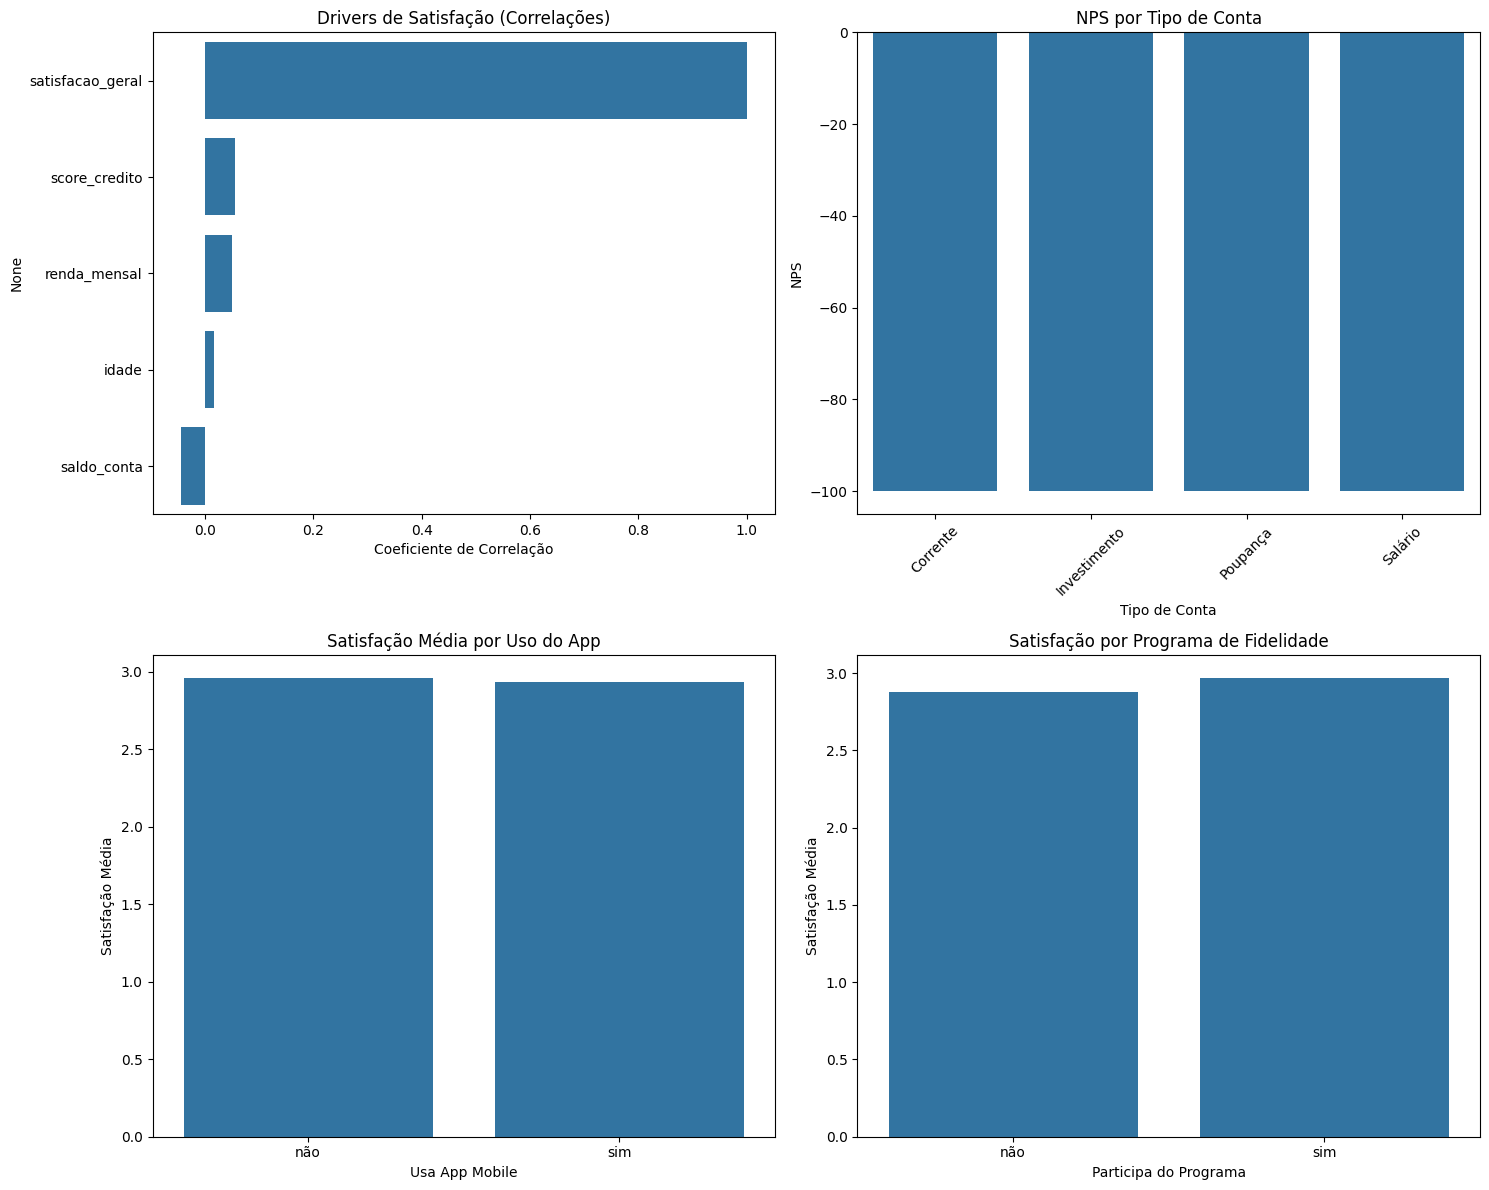


=== Análise de Satisfação dos Clientes ===

1. Principais Drivers de Satisfação (Correlações):
satisfacao_geral    1.000000
score_credito       0.054739
renda_mensal        0.050769
idade               0.016623
saldo_conta        -0.044587
Name: satisfacao_geral, dtype: float64

2. NPS por Tipo de Conta:
tipo_conta
Corrente       -100.0
Investimento   -100.0
Poupança       -100.0
Salário        -100.0
Name: satisfacao_geral, dtype: float64

3. Impacto do App Mobile:
                Média Satisfação  Desvio Padrão  Quantidade
usa_app_mobile                                             
não                         2.96           1.30          57
sim                         2.93           1.47         243

4. Impacto do Programa de Fidelidade:
                               Média Satisfação  Desvio Padrão  Quantidade
participa_programa_fidelidade                                             
não                                        2.88           1.49         119
sim                     

In [14]:
# Criar visualizações para análise de satisfação
plt.rcParams['figure.figsize'] = [15, 12]
fig, axes = plt.subplots(2, 2)

# 1. Correlações com Satisfação
sns.barplot(x=resultados_satisfacao['correlacoes'].values,
           y=resultados_satisfacao['correlacoes'].index,
           ax=axes[0,0])
axes[0,0].set_title('Drivers de Satisfação (Correlações)')
axes[0,0].set_xlabel('Coeficiente de Correlação')

# 2. NPS por Tipo de Conta
sns.barplot(x=resultados_satisfacao['nps_conta'].index,
           y=resultados_satisfacao['nps_conta'].values,
           ax=axes[0,1])
axes[0,1].set_title('NPS por Tipo de Conta')
axes[0,1].set_xlabel('Tipo de Conta')
axes[0,1].set_ylabel('NPS')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Satisfação Média por Uso do App
sns.barplot(x=resultados_satisfacao['satisfacao_digital'].index,
           y=resultados_satisfacao['satisfacao_digital']['Média Satisfação'],
           ax=axes[1,0])
axes[1,0].set_title('Satisfação Média por Uso do App')
axes[1,0].set_xlabel('Usa App Mobile')
axes[1,0].set_ylabel('Satisfação Média')

# 4. Satisfação por Programa de Fidelidade
sns.barplot(x=resultados_satisfacao['satisfacao_fidelidade'].index,
           y=resultados_satisfacao['satisfacao_fidelidade']['Média Satisfação'],
           ax=axes[1,1])
axes[1,1].set_title('Satisfação por Programa de Fidelidade')
axes[1,1].set_xlabel('Participa do Programa')
axes[1,1].set_ylabel('Satisfação Média')

plt.tight_layout()
plt.show()

# Imprimir análises detalhadas
print("\n=== Análise de Satisfação dos Clientes ===")

print("\n1. Principais Drivers de Satisfação (Correlações):")
print(resultados_satisfacao['correlacoes'])

print("\n2. NPS por Tipo de Conta:")
print(resultados_satisfacao['nps_conta'])

print("\n3. Impacto do App Mobile:")
print(resultados_satisfacao['satisfacao_digital'])

print("\n4. Impacto do Programa de Fidelidade:")
print(resultados_satisfacao['satisfacao_fidelidade'])

print("\n5. Satisfação por Produto (Tipo de Conta):")
print(resultados_satisfacao['satisfacao_produto'])